#Sales Prediction


Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing data and analysis

In [3]:
df=pd.read_csv("C:\\Users\\Edit pc\\Downloads\\Train.csv")

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filling out missing values with mean and mode

In [7]:
df["Item_Weight"].mean()

12.857645184136183

In [8]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace =True)

In [9]:
df.fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Analysis and Preprocessing

In [14]:
col=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

Outlier Analysis and Preprocessing 

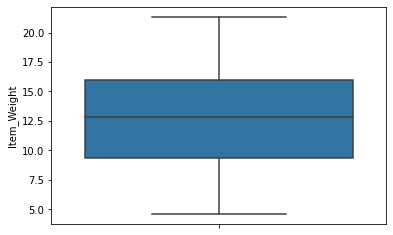

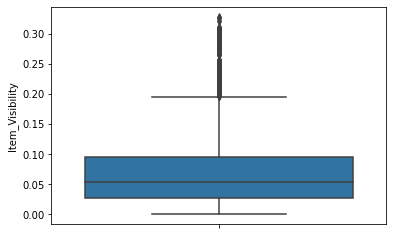

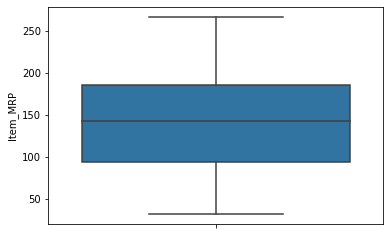

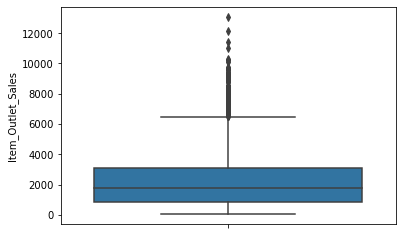

In [15]:
for c in col:
  plt.figure()
  sns.boxplot(y=c,data=df)

In [16]:
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[df[c]<upper_limit]
  df=df[df[c]>lower_limit]

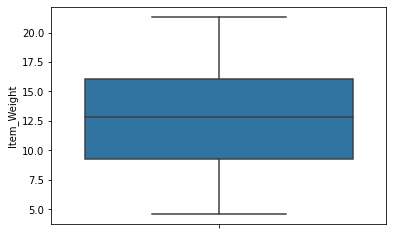

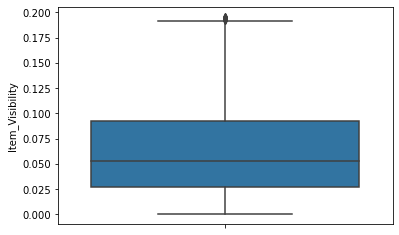

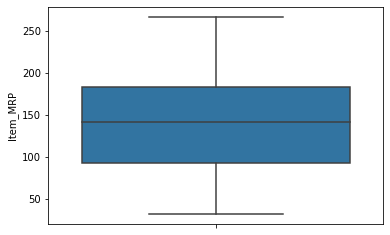

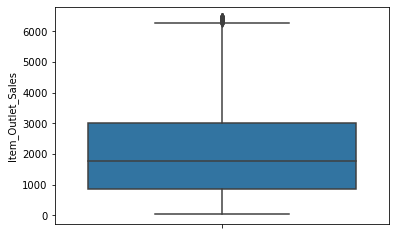

In [17]:
for c in col:
  plt.figure()
  sns.boxplot(y=c,data=df)

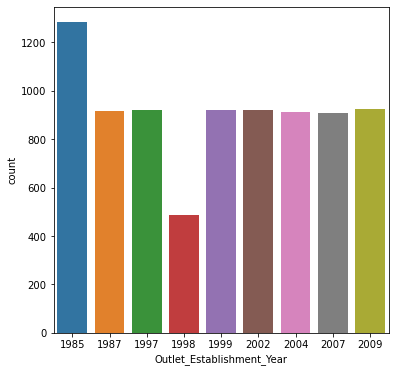

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

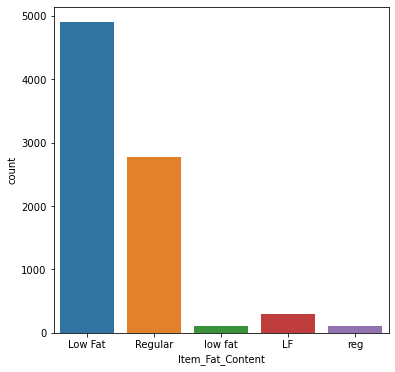

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

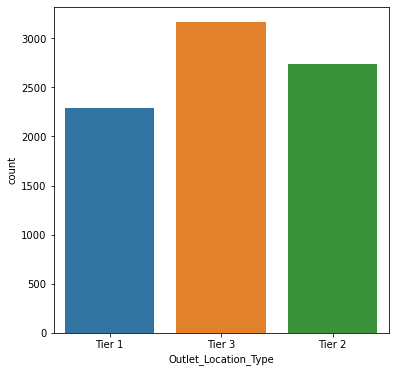

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

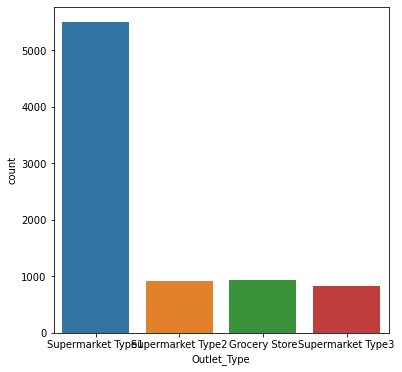

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=df)
plt.show()

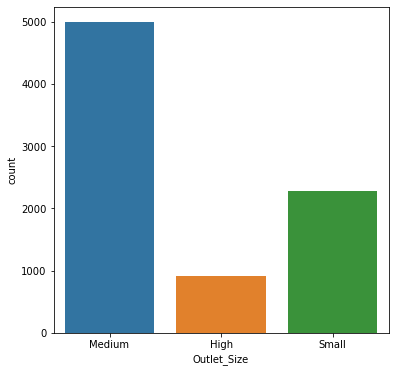

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    4898
Regular    2769
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64

In [24]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5309
Regular    2884
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [26]:
le=LabelEncoder()
col1=['Item_Identifier','Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for c in col1:
  df[c]=le.fit_transform(df[c])

In [27]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Spiliting Train and Test

In [28]:
X=df.drop(['Item_Outlet_Sales'],axis=1).values
Y=df['Item_Outlet_Sales'].values

In [29]:
X

array([[1.560e+02, 9.300e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [8.000e+00, 5.920e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [6.620e+02, 1.750e+01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.357e+03, 1.060e+01, 0.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [6.810e+02, 7.210e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [5.000e+01, 1.480e+01, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        1.000e+00]])

In [30]:
Y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

In [32]:
X.shape,X_train.shape,X_test.shape

((8193, 11), (6554, 11), (1639, 11))

Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Linear Regression Model

In [36]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [37]:
reg.coef_,reg.intercept_

(array([   2.66386504,    3.46413914,   27.07942761,  -51.69989342,
          -4.76258347,  867.40724594,  194.25408921,   45.99637686,
        -231.61746087, -174.97885843,  577.70210023]),
 2095.89400656088)

In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [39]:
Y_pred=reg.predict(X_test)
Y_pred

array([ 500.49355947, 1753.21374789, 2940.38684553, ..., 1314.18699076,
       3410.24144121, 2485.79206417])

In [40]:
metrics.mean_squared_error(Y_test,Y_pred)

1130604.4551302523

In [41]:
import numpy as np

In [42]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

1063.2988550404125

In [43]:
metrics.r2_score(Y_test,Y_pred)

0.47930450926621593

Unsatisfied with accuracy score so trying to remove some feature

In [44]:
X1=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1).values
Y1=df['Item_Outlet_Sales'].values

In [45]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=50)
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X1_train,Y1_train)

LinearRegression()

In [46]:
X1

array([[9.30000000e+00, 0.00000000e+00, 1.60473010e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.92000000e+00, 1.00000000e+00, 1.92782160e-02, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.75000000e+01, 0.00000000e+00, 1.67600750e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.06000000e+01, 0.00000000e+00, 3.51862710e-02, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.21000000e+00, 1.00000000e+00, 1.45220646e-01, ...,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.48000000e+01, 0.00000000e+00, 4.48782800e-02, ...,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [47]:
Y1_pred=reg.predict(X1_test)
Y1_pred

array([ 516.59729446, 1737.75931629, 2963.09551368, ..., 2237.28865506,
       1482.06893296,  555.27994713])

In [48]:
metrics.mean_squared_error(Y1_test,Y1_pred)

1119155.4096675077

In [49]:
np.sqrt(metrics.mean_squared_error(Y1_test,Y1_pred))

1057.9014177452962

In [50]:
metrics.r2_score(Y1_test,Y1_pred)

0.4863335648331536

In [51]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044707,-0.116886,-0.023404,-0.014870,0.012147,-0.010507,-0.014965,0.001839,0.002167,-0.004934,-0.000155
Item_Weight,0.044707,1.000000,-0.022438,-0.007557,0.029799,0.026178,-0.011108,-0.009335,-0.007829,0.005781,-0.003788,0.010881
Item_Fat_Content,-0.116886,-0.022438,1.000000,0.048348,-0.138588,0.009787,0.004842,0.002352,-0.002353,-0.002828,0.006367,0.026938
Item_Visibility,-0.023404,-0.007557,0.048348,1.000000,-0.037019,0.001426,-0.055446,-0.034039,0.036874,-0.012285,-0.095380,-0.071907
Item_Type,-0.014870,0.029799,-0.138588,-0.037019,1.000000,0.032007,-0.000645,0.004870,-0.001192,0.003328,0.000835,0.017097
Item_MRP,0.012147,0.026178,0.009787,0.001426,0.032007,1.000000,0.001025,0.027364,0.009646,-0.011203,-0.033508,0.564361
Outlet_Identifier,-0.010507,-0.011108,0.004842,-0.055446,-0.000645,0.001025,1.000000,0.079250,0.513831,-0.728711,0.079758,0.166767
Outlet_Establishment_Year,-0.014965,-0.009335,0.002352,-0.034039,0.004870,0.027364,0.079250,1.000000,0.211862,-0.090009,-0.109817,-0.009663
Outlet_Size,0.001839,-0.007829,-0.002353,0.036874,-0.001192,0.009646,0.513831,0.211862,1.000000,-0.609620,-0.191114,-0.073304
Outlet_Location_Type,0.002167,0.005781,-0.002828,-0.012285,0.003328,-0.011203,-0.728711,-0.090009,-0.609620,1.000000,0.465653,0.055296


Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100,random_state=0)
rfc.fit(X1_train,Y1_train)

RandomForestRegressor(random_state=0)

In [55]:
Y_pred2=rfc.predict(X1_test)

In [56]:
Y_pred2

array([ 657.317708, 1306.778976, 3541.310304, ..., 2673.479952,
       1739.329262,  182.369278])

In [58]:
Y1_test

array([ 413.4618,  559.272 , 5351.0346, ..., 2406.867 ,  826.9236,
        128.4994])

In [59]:
metrics.mean_squared_error(Y1_test,Y_pred2)

1029535.6901135907

In [60]:
np.sqrt(metrics.mean_squared_error(Y1_test,Y_pred2))

1014.660381661564

In [61]:
r2_test=metrics.r2_score(Y1_test,Y_pred2)
r2_test

0.5274669422588945

In [63]:
rf_accuracy = round(rfc.score(X1_train,Y1_train),2)
rf_accuracy

0.93

Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X1_train, Y1_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [66]:

y_pred3 = regressor.predict(X1_test)
y_pred3

array([ 541.7623638 , 1645.76872624, 2330.57072719, ..., 2473.52827948,
       1466.37510194, 1014.19717285])

In [67]:
metrics.mean_squared_error(Y1_test,y_pred3)

1089740.1236984793

In [68]:
np.sqrt(metrics.mean_squared_error(Y1_test,y_pred3))

1043.9061852956324

In [69]:
r2_test=metrics.r2_score(Y1_test,y_pred3)
r2_test

0.4998345004070729

In [70]:
tree_accuracy = round(regressor.score(X1_train,Y1_train),2)
tree_accuracy

0.53